# Stacking & Bagging

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time 
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import arff
import pandas as pd

data =arff.loadarff('/content/drive/MyDrive/DATAMINING/tugas/messidor_features.arff')
df = pd.DataFrame(data[0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [ ]:
col_names=[]
for i in range (20):
  if i == 0:
    col_names.append('quality')
  if i == 1:
    col_names.append('prescreen')
  if i >= 2 and i <= 7:
    col_names.append('ma' + str(i))
  if i >= 8 and i <= 15:
    col_names.append('exudate' + str(i))
  if i == 16:
    col_names.append('euDist')
  if i == 17:
    col_names.append('diameter')
  if i == 18:
    col_names.append('amfm_class')
  if i == 19:
    col_names.append('label')

In [ ]:
df.columns = [col_names]
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [ ]:
X = df.drop(columns=['label'])
X

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0


## Rumus prepocessing data Min Max

$$
\displaystyle x = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler.fit(features)
#scaler.transform(features)
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
#features_names.remove('label')
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
5,1.0,1.0,0.286667,0.320611,0.336134,0.384615,0.375000,0.318182,0.069395,0.041498,0.021738,0.005417,0.000000,0.000000,0.000000,0.000000,0.601764,0.426770,0.0
6,1.0,0.0,0.186667,0.213740,0.235294,0.250000,0.250000,0.170455,0.037412,0.054531,0.015400,0.000000,0.000000,0.000000,0.000000,0.000000,0.775126,0.506339,0.0
7,1.0,1.0,0.033333,0.038168,0.042017,0.048077,0.010417,0.000000,0.050374,0.056828,0.011536,0.002516,0.000000,0.000000,0.000000,0.000000,0.929166,0.081622,1.0
8,1.0,1.0,0.140000,0.152672,0.142857,0.134615,0.125000,0.102273,0.164381,0.140880,0.057991,0.008305,0.000000,0.000000,0.000000,0.000000,0.589477,0.365093,0.0
9,1.0,1.0,0.520000,0.564885,0.605042,0.673077,0.656250,0.522727,0.053997,0.060159,0.008246,0.001670,0.000455,0.000000,0.000000,0.000000,0.860738,0.317608,0.0


## Save model prepocessing

In [ ]:
import joblib
filename = "norm.sav"
joblib.dump(scaler, filename) 

['norm.sav']

In [ ]:
y = df['label'].values

## Encoder Label

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_baru = le.fit_transform(y)
y_baru

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_features, y_baru, test_size=0.2, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
# Predicting the training set
y_train_pred = gnb.predict(X_train)
# Predicting the test set
y_test_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
gnb_train = accuracy_score(y_train, y_train_pred)
gnb_test = accuracy_score(y_test, y_test_pred)

In [ ]:
# print(f’Gausin train/test accuracies: {gnb_train:.3f}/{gnb_test:.3f}’)
print(f'Gausin train/test accuracies: {gnb_train:.3f}/{gnb_test:.3f}')

Gausin train/test accuracies: 0.640/0.632


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=14, max_depth=2, random_state=0)

In [ ]:
# bag = bag.fit(X_train, y_train)
clf = clf.fit(X_train, y_train)

## Stacking - Random Forest

> **Stacking** *melibatkan pemasangan banyak jenis model yang berbeda pada data yang sama dan menggunakan model lain untuk mempelajari cara terbaik menggabungkan prediksi.*

In [ ]:
n = list(range(2,500))
acuracy = []
for i in n:
  clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
  clf = clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  bag_test = accuracy_score(y_test, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)

acuracy n = 2 = 0.6406926406926406
acuracy n = 3 = 0.645021645021645
acuracy n = 4 = 0.6493506493506493
acuracy n = 5 = 0.6406926406926406
acuracy n = 6 = 0.6493506493506493
acuracy n = 7 = 0.6493506493506493
acuracy n = 8 = 0.645021645021645
acuracy n = 9 = 0.6363636363636364
acuracy n = 10 = 0.645021645021645
acuracy n = 11 = 0.6406926406926406
acuracy n = 12 = 0.658008658008658
acuracy n = 13 = 0.6536796536796536
acuracy n = 14 = 0.6666666666666666
acuracy n = 15 = 0.6666666666666666
acuracy n = 16 = 0.658008658008658
acuracy n = 17 = 0.658008658008658
acuracy n = 18 = 0.658008658008658
acuracy n = 19 = 0.658008658008658
acuracy n = 20 = 0.658008658008658
acuracy n = 21 = 0.658008658008658
acuracy n = 22 = 0.6666666666666666
acuracy n = 23 = 0.6666666666666666
acuracy n = 24 = 0.6666666666666666
acuracy n = 25 = 0.6666666666666666
acuracy n = 26 = 0.6666666666666666
acuracy n = 27 = 0.6536796536796536
acuracy n = 28 = 0.6623376623376623
acuracy n = 29 = 0.6536796536796536
acuracy n 

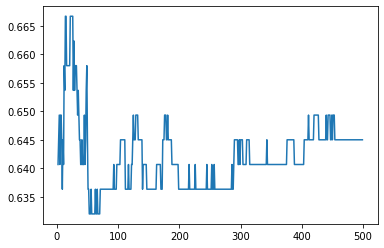

In [ ]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [ ]:
# stacking
max(acuracy)

0.6666666666666666

## Bagging - Bootstrap Aggregation

> **Bagging** *melibatkan pemasangan banyak decision tree pada sampel yang berbeda dari dataset yang sama dan merata-ratakan atau voting hasil prediksi.*

In [ ]:
n = list(range(2,500))
acuracy = []
for i in n:
  bag = BaggingClassifier(
          base_estimator=gnb, # knn,gnb, jst
          n_estimators=i,
          random_state=0)
  bag = bag.fit(X_train, y_train)
  y_test_pred = bag.predict(X_test)
  bag_test = accuracy_score(y_test, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)
max(acuracy)

acuracy n = 2 = 0.6363636363636364
acuracy n = 3 = 0.6363636363636364
acuracy n = 4 = 0.6363636363636364
acuracy n = 5 = 0.6363636363636364
acuracy n = 6 = 0.6406926406926406
acuracy n = 7 = 0.6536796536796536
acuracy n = 8 = 0.6363636363636364
acuracy n = 9 = 0.6493506493506493
acuracy n = 10 = 0.6406926406926406
acuracy n = 11 = 0.6406926406926406
acuracy n = 12 = 0.6536796536796536
acuracy n = 13 = 0.6536796536796536
acuracy n = 14 = 0.6536796536796536
acuracy n = 15 = 0.6493506493506493
acuracy n = 16 = 0.645021645021645
acuracy n = 17 = 0.6493506493506493
acuracy n = 18 = 0.645021645021645
acuracy n = 19 = 0.6493506493506493
acuracy n = 20 = 0.6493506493506493
acuracy n = 21 = 0.6536796536796536
acuracy n = 22 = 0.6536796536796536
acuracy n = 23 = 0.6493506493506493
acuracy n = 24 = 0.6493506493506493
acuracy n = 25 = 0.6493506493506493
acuracy n = 26 = 0.658008658008658
acuracy n = 27 = 0.6536796536796536
acuracy n = 28 = 0.6493506493506493
acuracy n = 29 = 0.6406926406926406
acu

0.6623376623376623

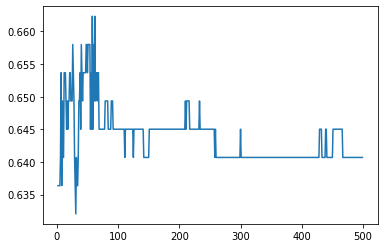

In [ ]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [ ]:
max(acuracy)

0.6623376623376623

In [ ]:
# Predicting the training set
# y_train_pred = clf.predict(X_train)
# Predicting the test set
y_test_pred = clf.predict(X_test)

In [ ]:
# bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print(f'Gausin test accuracies: {bag_test:.3f}')

Gausin test accuracies: 0.645


In [ ]:
n = list(range(10,110,10))
n

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

## Predict

In [ ]:
a = np.array(df.iloc[:10,:-1])
test_data = np.array(a).reshape(10,-1)
test_data.shape

(10, 19)

In [ ]:
scaler = joblib.load(filename)
test_d = scaler.fit_transform(test_data)
pd.DataFrame(test_d)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.219178,0.231884,0.238806,0.200000,0.258065,0.282609,0.672228,0.514778,0.395903,0.159051,0.013367,0.018390,0.093814,0.506586,0.109262,0.394775,1.0
1,0.0,1.0,0.246575,0.260870,0.238806,0.184615,0.225806,0.260870,0.824719,0.800841,0.237437,0.048263,0.002800,0.010457,0.093335,0.504003,0.448014,1.000000,0.0
2,0.0,1.0,0.767123,0.782609,0.791045,0.738462,0.725806,0.695652,0.788061,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.547593,0.783674,0.0
3,0.0,1.0,0.671233,0.681159,0.701493,0.676923,0.661290,0.652174,0.488234,0.546593,0.709330,0.634635,0.602818,0.729893,0.183012,0.197701,0.073210,0.596090,0.0
4,0.0,1.0,0.520548,0.550725,0.567164,0.538462,0.596774,0.565217,0.050306,0.077645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715828,0.0
5,0.0,1.0,0.520548,0.536232,0.522388,0.538462,0.564516,0.608696,0.251895,0.000000,0.154384,0.066716,0.000000,0.000000,0.000000,0.000000,0.267934,0.759036,0.0
6,0.0,0.0,0.315068,0.333333,0.343284,0.323077,0.370968,0.326087,0.000000,0.103436,0.099625,0.000000,0.000000,0.000000,0.000000,0.000000,0.655569,0.934022,0.0
7,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102086,0.121669,0.066244,0.030992,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
8,0.0,1.0,0.219178,0.217391,0.179104,0.138462,0.177419,0.195652,1.000000,0.788758,0.467597,0.102297,0.000000,0.000000,0.000000,0.000000,0.240459,0.623400,0.0
9,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130619,0.148101,0.037814,0.020564,0.016778,0.000000,0.000000,0.000000,0.846996,0.518972,0.0
